In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [2]:
with open("../oc20_data_mapping.pkl", "rb") as input_file:
    mappings = pickle.load(input_file)
with open("../mapping_adslab_slab.pkl", "rb") as input_file:
    slab_adslab_mappings = pickle.load(input_file)

In [3]:
df_200k = pd.read_csv("../s2ef_200k_ads_energies_forces_slab.csv")
df_200k["total_energy_conv_errors"] = df_200k["new_total_energies"] - df_200k["old_total_energies"]
df_200k["ref_energy_conv_errors"] = df_200k["new_ads_energies"] - df_200k["old_ads_energies"]

In [4]:
material_classes = []
surfaces = []
adsorbates = []
for sid in tqdm(df_200k["sid"]):
    material_classes.append(mappings[sid]["class"])
    surfaces.append(mappings[sid]["bulk_symbols"])
    adsorbates.append(mappings[sid]["ads_symbols"])
material_classes = np.array(material_classes)
# add system information to the dataframe
df_200k["cat_class"] = material_classes
df_200k["bulk_symbols"] = surfaces
df_200k["ads_symbols"] = adsorbates

100%|██████████| 186735/186735 [00:00<00:00, 573060.35it/s]


<Figure size 2560x1920 with 0 Axes>

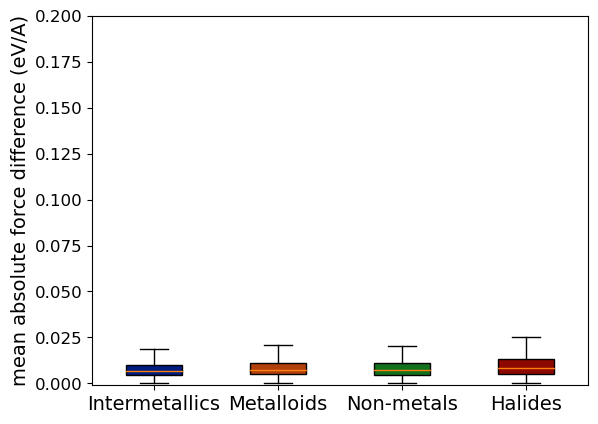

: 

In [9]:
plt.figure(dpi=400)
fig, ax = plt.subplots()  # Create a figure and an axes object

# Define colors for different categories
colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals': '#12711c', 'Halides': '#8c0800'}

force_maes = {
    "Intermetallics": df_200k.query("cat_class==0")["forces_mae"], 
    "Metalloids": df_200k.query("cat_class==1")["forces_mae"],
    "Non-metals": df_200k.query("cat_class==2")["forces_mae"],
    "Halides": df_200k.query("cat_class==3")["forces_mae"],
}

# Use force_maes instead of energy_maes
data = [force_maes[key] for key in force_maes.keys()]
box = ax.boxplot(data, patch_artist=True, showfliers=False)

# Use force_maes.keys() to get the correct categories
for patch, color in zip(box['boxes'], [colors[category] for category in force_maes.keys()]):
    patch.set_facecolor(color)

# Set x-tick labels to the keys from force_maes
ax.set_xticklabels(force_maes.keys(),fontsize=14)

ax.tick_params(axis='y', labelsize=12)
plt.ylabel("mean absolute force difference (eV/A)", fontsize=14)
# Enable bottom x-ticks
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax.set_ylim(-0.001, 0.2)
plt.show()  # Display the plot

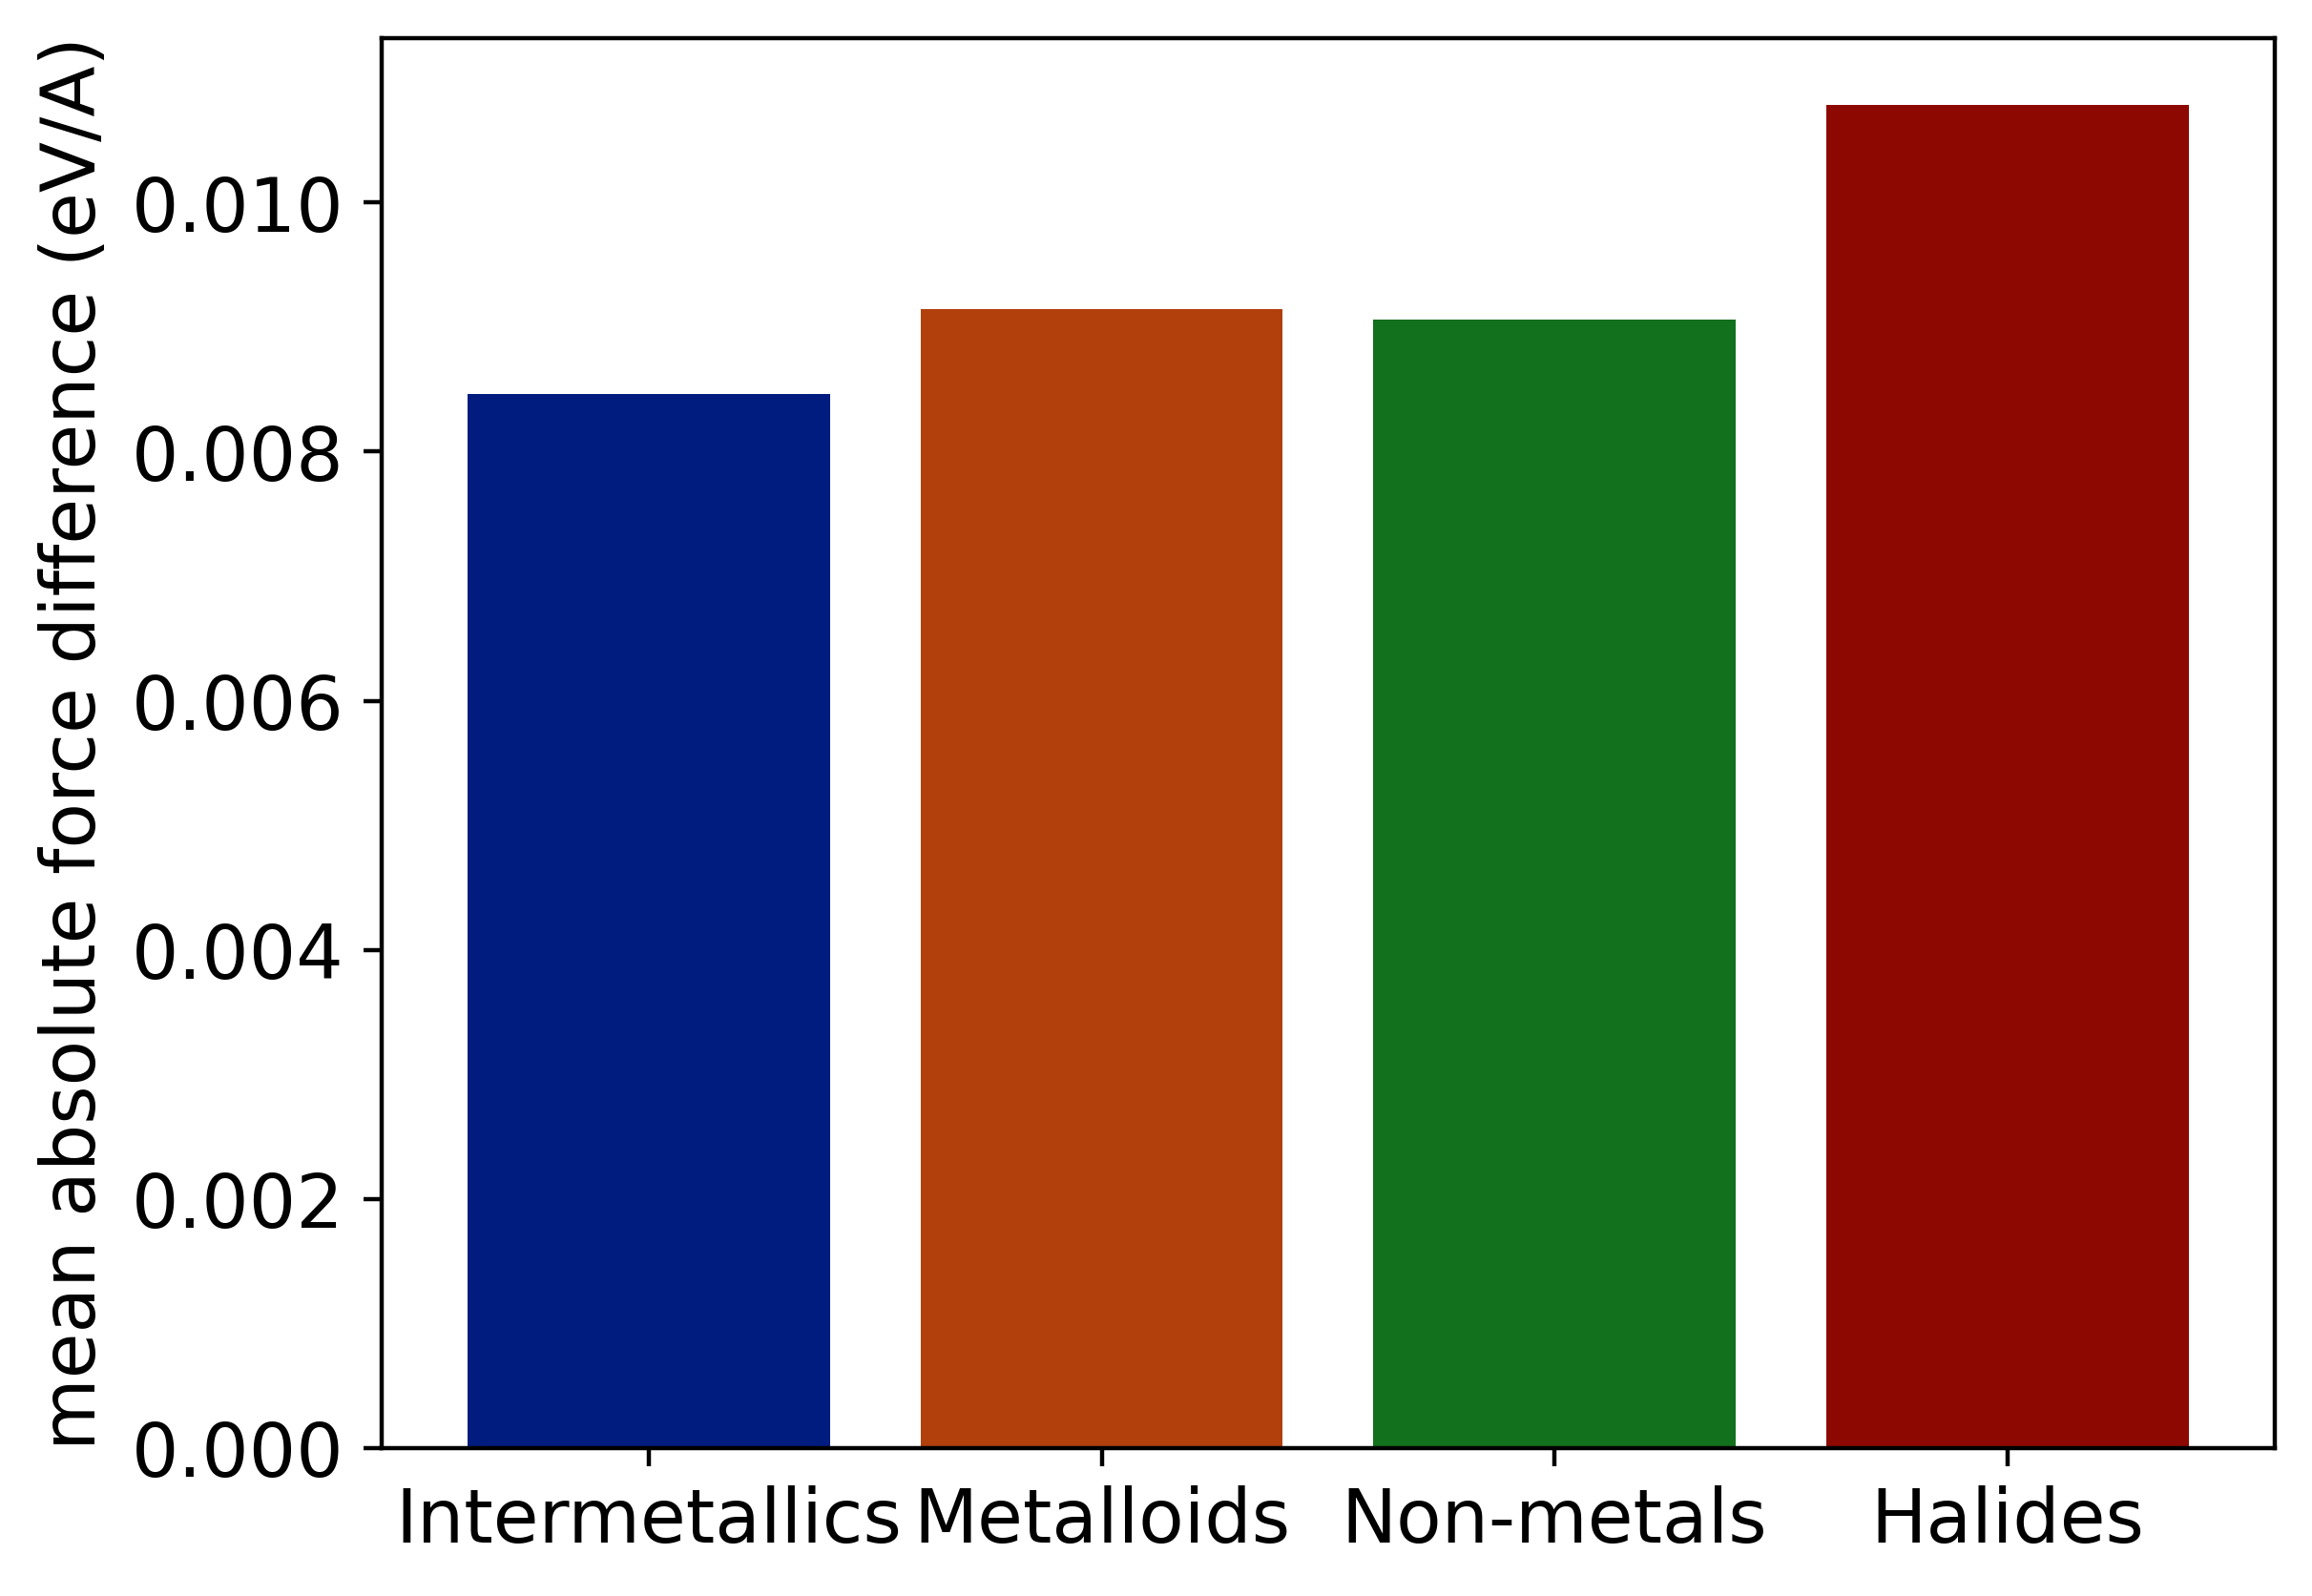

In [7]:
plt.figure(dpi=400)

# Define colors for different categories
colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals': '#12711c', 'Halides': '#8c0800'}

force_maes = {"Intermetallics":np.mean(np.abs(df_200k.query("cat_class==0")["forces_mae"])), 
              "Metalloids":np.mean(np.abs(df_200k.query("cat_class==1")["forces_mae"])),
               "Non-metals":np.mean(np.abs(df_200k.query("cat_class==2")["forces_mae"])),
               "Halides":np.mean(np.abs(df_200k.query("cat_class==3")["forces_mae"])),
              }

# Plot the bar chart with specified colors
plt.bar(force_maes.keys(), force_maes.values(), 
        color=[colors[category] for category in force_maes.keys()], label="ML errors")
plt.ylabel("mean absolute force difference (eV/A)", fontsize=14)
# plt.xlabel("Material classes", fontsize=16)
# plt.xticks([])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()